# Multilinear Regression
---
## Brief:  
After taking the **Machine Learning Specialization** by **Andrew NG**, this is an implementation for Multilinear Regression on a dataset that measures student performance in relation to _multiple features_  
Where i'll be implementing:

- [Data Preparation](#data-preparation)
- [Normalization of Data](#normalization)
- [Cost Function](#cost-function)
- [Gradient Descent](gradient-descent)


In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Preparation

- Use pandas to import data into variables
- Seperate data into training and testing set

In [121]:
x = pd.read_csv('Student_Performance.csv', usecols=[0, 1, 2, 3, 4], sep=',')
y = pd.read_csv('Student_Performance.csv', usecols=[5], sep=',')
x["Extracurricular Activities"] = x['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

x_train_raw, y_train, x_test_raw, y_test = x[7000:].values, y[7000:].values, x[:3000].values, y[:3000].values

## Normalization

### Goal: Normalizing data using **z-score normalization**

This is done since the data in this training set has values all over the place.


Before normatization:  
- ``x_train_raw = [ 4 90  1  8  4]`` (Some values are large like 90, some values are tiny like 1)

After normalization:
- ``x_train = [-0.39270927  1.17087605  0.98543933  0.86004793 -0.20328004]`` (All values vary around -1 to 1)


The Z-score is calculated using the formula:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:  
- $x$ is the original data point
- $\mu$ is the mean
- $\sigma$ is the deviation

In [122]:
def z_score(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    return (x - mu) / sigma

## Cost Function
Here ill be implementing a simple MSE (Mean Squared Error) cost function using the following formula:  


$$
\text{MSE} = \frac{1}{2m} \sum_{i=1}^{m} \left( y_i - \hat{y}_i \right)^2
$$

Where:
- $m$ is the number of data points  
- $y_i$ is the true value  
- $\hat{y}_i$ is the predicted value

In [123]:
def cost(w, b, x, y):
    m = len(x)
    err = 0.
    for i in range(m):
        f_wb = x[i,:] @ w + b
        err += y[i] - f_wb
    err /= m * 2
    return err

## Gradient Descent

- Gradient descent is calulated using this (very fancy and confusing looking mathematical formula):  


$$
w_j := w_j - \alpha \frac{\partial j(w,b)}{\partial w_j}
$$

$$
b := b - \alpha \frac{\partial j(w,b)}{\partial b}
$$

- But really, in code terms, those confusing derivates are just as simple as this:  
$$
\frac{\partial j(w,b)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}
$$

$$
\frac{\partial j(w,b)}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
$$


See? its just the cost function. But for the ${x}$ parameter we simply multiply the cost by ${x^i}$ And for ${b}$, its just the cost.  
That is how we *update the model's parameters* and successfully *train the model* to fit the data.

Notes:
- ${j(w,b)}$ is the cost function
- ${m}$ is the number of training examples
- ${\hat{y}}$ is the model's prediction f_wb of y
- ${y}$ is the target value y

In [124]:
def gradient_descent(w, b, x, y, itterations, alphar):
    err_arr = []
    w_arr = []
    b_arr = []

    # Repeat until convergence
    for i in range(itterations):
        dj_dw = 0.
        dj_db = 0.
        m = len(x)
        for j in range(m):
            err = (x[j,:] @ w + b) - y[j]
            dj_dw += err * x[i,:]
            dj_db += err
        dj_dw /= m
        dj_db /= m
        w = w - alphar * dj_dw
        b = b - alphar * dj_db

        ## Extra code, for visualization purposes ##
        err_arr.append(cost(w, b, x, y))
        w_arr.append(w[0])
        b_arr.append(b)
        ## Extra code, for visualization purposes ##
    return w, b, err_arr, w_arr, b_arr

## Testing and Training

Now is the final step, combining all made functions.  
I will be doing the following:  
- Normalizing the training data with the ``z_score()`` function
- Testing the model's cost with it's initial parameters using ``compute_cost()`` function
- Plotting variation of cost after running gradient descent using ``gradient_descent()`` function

In [125]:
w, b = np.random.rand(5, 1), 0.0 # Random parameters
x_train, x_test = z_score(x_train_raw), z_score(x_test_raw) # Normalizing training and testing sets

w, b, err_arr, w_arr, b_arr = gradient_descent(w, b, x_train, y_train, 200, 0.1) # Running gradient descent

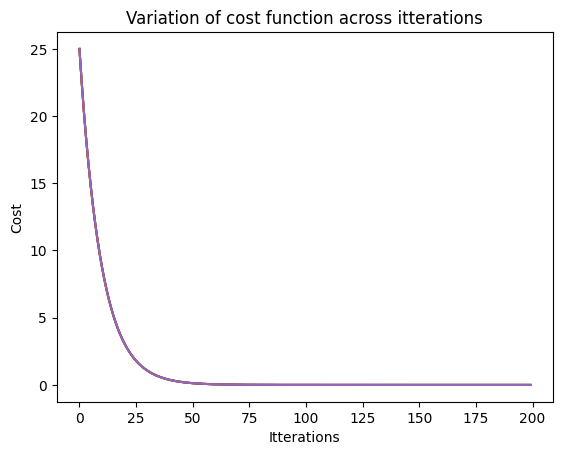

In [126]:
plt.plot(range(200), err_arr)
plt.xlabel("Itterations")
plt.ylabel("Cost")
plt.title("Variation of cost function across itterations")
plt.show()

## Conclusion

This was **Multivariate linear regression**, where we wrote the model using just numpy and math, then successfully made it diverge with gradient descent!! >;D

---

### *Written by: Ziad Alezzi (lucirie):*
- [Github](https://github.com/lucirie)
- [Linkedin](https://www.linkedin.com/in/ziad-alezzi-8727bb345/)